# Biodiversity in National Parks

## Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

The following questions will be answered:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

### Import Python Modules

In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

#### species

The `species_info.csv` contains information on different species in the national parks. The columns in the data set are:
- **category** - the taxonomy for each species
- **scientific_name** - the scientific name of each species
- **common_names** - the common names of each species
- **conservation_status** - the species conservation status


In [6]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


There are 5824 rows and 4 columns in `species`.

In [8]:
species.shape

(5824, 4)

#### observations

The `observations.csv` contains information from recorded sightings of different species throughout the national parks. The columns in the data set are:
- **scientific_name** - the scientific name of the species
- **park_name** - the name of the national park in which the species was found
- **observations** - the number of sightings of each species

In [10]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


There are 23,296 rows and 3 columns in `observations`.

In [12]:
observations.shape

(23296, 3)

### Explore the Data 

#### species 

In [198]:
# Number of species in this dataset
print(f'Number of species: {species.scientific_name.nunique()}')

Number of species: 5541


In [196]:
# Number of categories
print(f'Number of categories: {species.category.nunique()}')

Number of categories: 7


In [194]:
# Categories of species
print(f'Categories: {species.category.unique()}')

Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [192]:
# Number of species by category
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [188]:
# Number of conservation statuses and the types
print(f'Conservation status: {species.conservation_status.nunique()}')
print(f'Conservation statuses: {species.conservation_status.unique()}')

Conservation status: 5
Conservation statuses: ['No Intervention' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


In [186]:
# Number of species in each conservation status
print(species.groupby('conservation_status').size())
print(f'NaN values: {species.conservation_status.isna().sum()}')

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64
NaN values: 0


#### observations 

In [182]:
# Total number of parks and their names
print(f'Number of parks: {observations.park_name.nunique()}')
print(f'Unique parks: {observations.park_name.unique()}')

Number of parks: 4
Unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [184]:
# Total number of observations across all national parks
print(f'Number of observations: {observations.observations.sum()}')

Number of observations: 3314739


### Analysis

##### What is the distribution of conservation status for each species?

In [180]:
# Replace NaN with No Intervention
species.fillna('No Intervention', inplace = True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [178]:
# Create a table that shows the number of each species category within each conservation status
conservation_category = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()
   

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


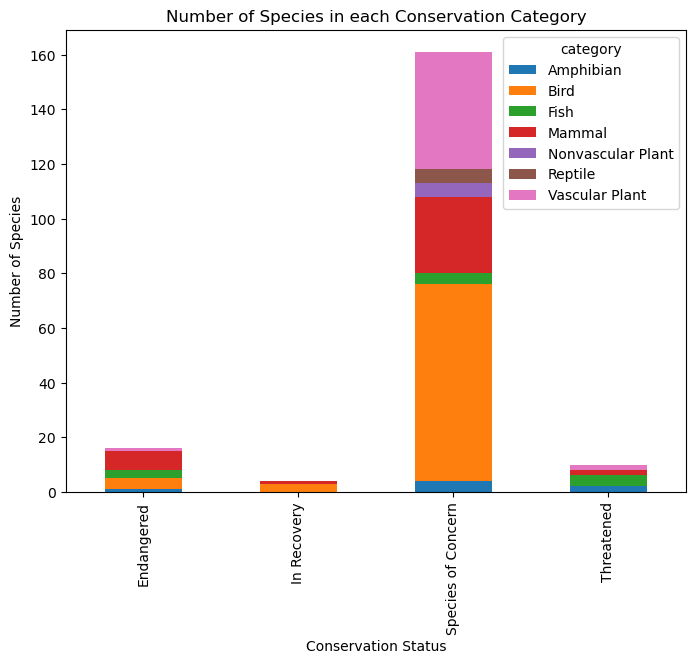

In [176]:
# Create a stacked bar chart for conservation status against number of species
ax = conservation_category.plot(figsize = (8,6), kind = 'bar', stacked = True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
ax.set_title('Number of Species in each Conservation Category');

##### Are certain types of species more likely to be endangered?

In [172]:
# Create 'Is Protected' column (includes all species that have a value other than 'No Intervention'
species['is_protected'] = species.conservation_status != 'No Intervention'

In [174]:
# Group by category and is_protected
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [170]:
# Create column for percentage of each species that is protected
category_counts['percent_protected'] = category_counts['protected']/\
                                    (category_counts['protected'] + category_counts['not_protected']) * 100
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


~ 17% of mammals and ~15% of birds are under protection

#### Statistical Significance

##### Are the differences between species and their conservation status significant?

#### Mammals and Birds 

In [168]:
# Import chi2_contingency from scipy.stats
from scipy.stats import chi2_contingency

# Run chi-squared test to see statistical significant difference between mammals and birds
contingency1 = [[30, 146], [75, 413]]

chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The p-value from this test (0.69) is greater than the standard p-value for statistical significance (0.05). Therefore there is no significant association between mammals and birds.

#### Reptiles and Mammals

In [166]:
# Run chi-squared test to see statistical significant difference between mammals and reptiles
contingency2 = [[30, 146], [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

The p-value is 0.038 which is below the standard threshold of 0.05 meaning that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared to reptiles.

#### Species in Parks

##### Which animal is most prevalent and what is their distribution amongst parks?

In [164]:
# Import chain from itertools
from itertools import chain
import string

# Function to remove punctuation
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Create list of common names of mammals with punctuation removed
common_Names = species[species.category == 'Mammal']\
    .common_names\
    .apply(remove_punctuation)\
    .str.split().tolist()

# Output first 6 rows
common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [154]:
# Remove duplicate names in each row
clean_rows = []

for i in common_Names:
    i = list(dict.fromkeys(i))
    clean_rows.append(i)

clean_rows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [156]:
# Collapse words into single list
names = [item for sublist in clean_rows for item in sublist]
names[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [152]:
# Count the number of occurences of each word
word_count = []

for i in names:
    j = names.count(i)
    word_count.append((i,j))

#Create dataframe of number of occurences in descending order
pd.DataFrame(set(word_count), columns = ['Word', 'Count']).sort_values('Count', ascending = False).head(10)

,Word,Count
184,Bat,23
181,Shrew,18
38,Myotis,17
47,Mouse,16
87,Chipmunk,13
203,American,12
165,Squirrel,12
57,Vole,11
36,Eastern,11
172,Mountain,10


From this analysis, `Bat` occurred most (23 times) while `Shrew` came up 18 times.

In [150]:
# Check which species are bats by creating an is_bat column made up of boolean values
species['is_bat'] =  species.common_names.str.contains(r"\bBat\b", regex = True)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [148]:
# Subset of data where 'is_bat' is true
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [146]:
# Merge bat species with observations
bat_obs = observations.merge(species[species.is_bat])
bat_obs

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [144]:
# Total number of bat observations at each national park
bat_obs.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [142]:
# Protected bats vs. non-protected bat sightings in each park
obs_by_park = bat_obs.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


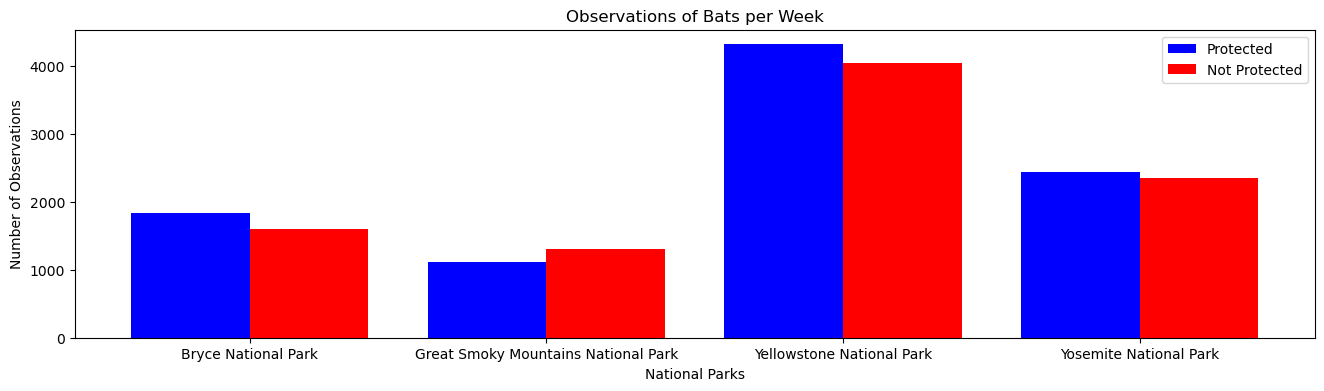

In [138]:
# Separate the data into protected and not protected
protected = obs_by_park[obs_by_park['is_protected']]
not_protected = obs_by_park[~obs_by_park['is_protected']]

# Prepare the positions for the bars
bar_width = 0.4
positions = np.arange(len(obs_by_park['park_name'].unique()))

# Plotting
fig, ax = plt.subplots(figsize=(16, 4))

# Plot the bars for protected observations
bars1 = ax.bar(positions - bar_width/2, protected['observations'], bar_width, label='Protected', color='b')

# Plot the bars for not protected observations
bars2 = ax.bar(positions + bar_width/2, not_protected['observations'], bar_width, label='Not Protected', color='r')

# Set the labels and title
ax.set_xlabel('National Parks')
ax.set_ylabel('Number of Observations')
ax.set_title('Observations of Bats per Week')
ax.set_xticks(positions)
ax.set_xticklabels(obs_by_park['park_name'].unique())

# Add a legend
ax.legend()

# Show the plot
plt.show()

The plot shows that there are more sightings of protected bats compared to non-protected species in Bryce, Yellowstone and Yosemite National Parks. However, Great Smoky National Park has greater observations of non-protected species of bats meaning that more efforts can be made in conservation.

## Conclusions

The project was able to make several data visualisations and inferences about the various species in four of the national parks that comprised this data set.

The project was able to answer the questions posed:

- What is the distribution of conservation status for species?
  - The vast majority of species were not part of conservation (5633 vs. 191).
- Are certain types of species more likely to be endangered?
  - Mammals and birds has the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
  - While mammals and birds did not have a significant difference in conservation percentage (p = 0.89), mammals and reptiles exhibited a statistically significant difference (p = 0.38).
- Which animal is most prevalent and what is their distribution amongst parks?
  - The study found that bats were most prevalent and were most likely to be observed in Yellowstone National Park.